In [ ]:
import numpy as np
import pandas as pd

import random
import scipy.stats as sts

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

 1. Загрузить данные из файла “insurance.csv”.

In [ ]:
df = pd.read_csv("insurance.csv")
print(df.shape)
df.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


2. С помощью метода describe() посмотреть статистику по данным. Сделать
выводы.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


3. Построить гистограммы для числовых показателей.

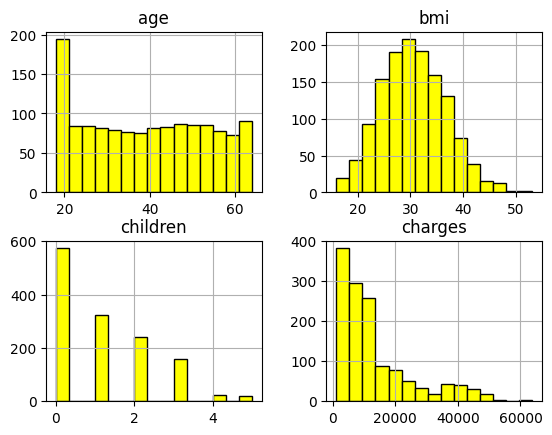

In [ ]:
df.hist(color='yellow', edgecolor='black', bins=15)
plt.show()

4. Найти меры центральной тенденции и меры разброса для индекса массы
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и
на гистограммах (3 вертикальные линии). Добавить легенду на графики.

Меры центральной тенденции:
- среднее;
- медиана;
- мода.

In [ ]:
def base_statistics(feature, name):
    mean = np.mean(feature)
    median = np.median(feature)
    mode = sts.mode(feature)

    print(f'\nМеры центральной тенденции для {name}:\n')
    print('Среднее: ', mean)
    print('Медиана: ', median)
    print('Мода и количество ее вхождений: ', mode)

    maximum = feature.max()
    minimum = feature.min()
    scope = maximum - minimum
    std = feature.std()

    print(f'\nМеры разброса для {name}:\n')
    print('Размах: ', scope)
    print('Стандартное отклонение: ', std)

    iqr = sts.iqr(feature, interpolation='midpoint')
    print('Межквартильный размах (IQR): ', iqr)

    statistics = {'mean': mean, 'median': median, 'mode': mode,
                  'scope': scope, 'std': std, 'iqr': iqr}

    return statistics

In [ ]:
stats_bmi = base_statistics(df.bmi, 'bmi')
stats_charges = base_statistics(df.charges, 'charges')


Меры центральной тенденции для bmi:

Среднее:  30.66339686098655
Медиана:  30.4
Мода и количество ее вхождений:  ModeResult(mode=32.3, count=13)

Меры разброса для bmi:

Размах:  37.17
Стандартное отклонение:  6.098186911679017
Межквартильный размах (IQR):  8.384999999999998

Меры центральной тенденции для charges:

Среднее:  13270.422265141257
Медиана:  9382.033
Мода и количество ее вхождений:  ModeResult(mode=1639.5631, count=2)

Меры разброса для charges:

Размах:  62648.554110000005
Стандартное отклонение:  12110.011236693994
Межквартильный размах (IQR):  11879.80148


**Отображение мер центральной тенденции**

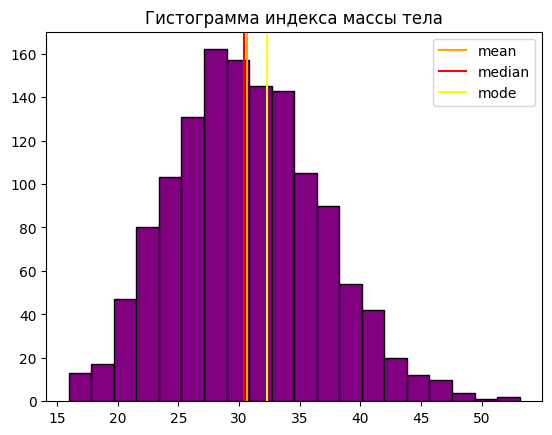

In [ ]:
plt.hist(df.bmi, edgecolor='black', color='purple', bins=20)
plt.title('Гистограмма индекса массы тела')
plt.axvline(stats_bmi['mean'], color='orange', label='mean')
plt.axvline(stats_bmi['median'], color='red', label='median')
plt.axvline(float(stats_bmi['mode'][0]), color='yellow', label='mode')
plt.legend()
plt.show()

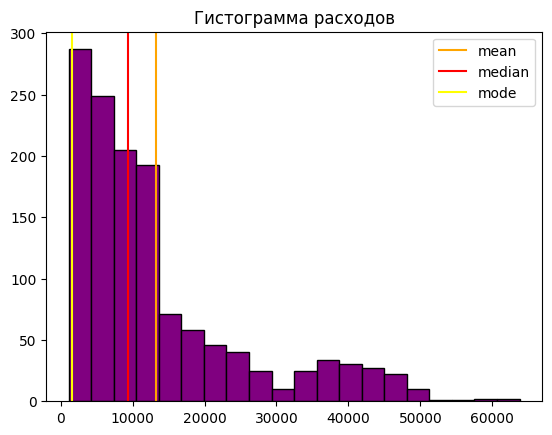

In [ ]:
plt.hist(df.charges, edgecolor='black', color='purple', bins=20)
plt.title('Гистограмма расходов')
plt.axvline(stats_charges['mean'], color='orange', label='mean')
plt.axvline(stats_charges['median'], color='red', label='median')
plt.axvline(float(stats_charges['mode'][0]), color='yellow', label='mode')
plt.legend()
plt.show()

**Отображение мер разброса**

In [ ]:
stats_bmi_go = pd.DataFrame.from_dict(stats_bmi).iloc[0].transpose()
stats_bmi_go = pd.DataFrame(stats_bmi_go)
stats_bmi_go.rename(columns={0: 'bmi'}, inplace=True)

stats_charges_go = pd.DataFrame.from_dict(stats_charges).iloc[0].transpose()
stats_charges_go = pd.DataFrame(stats_charges_go)
stats_charges_go.rename(columns={0: 'charges'}, inplace=True)

result_stat = pd.concat([stats_bmi_go, stats_charges_go], axis=1)
result_stat = result_stat.iloc[3:]
result_stat.reset_index(inplace=True)
result_stat.rename(columns={'index': 'Параметр'}, inplace=True)
result_stat.bmi = result_stat.bmi.apply(lambda x: round(x, 2))
result_stat.charges = result_stat.charges.apply(lambda x: round(x, 2))
result_stat

,Параметр,bmi,charges
0,scope,37.17,62648.55
1,std,6.10,12110.01
2,iqr,8.38,11879.80


In [ ]:
fig = go.Figure(px.bar(result_stat, 'Параметр', 'bmi', text = 'bmi', color='Параметр'))
fig.update_traces(textfont_size = 14, textangle = 0, textposition = 'outside', marker = dict(line = dict(color = 'black', width = 2)))
fig.update_layout(
    title  = 'Меры разброса', title_font_size = 16, title_x = 0.5,
    height = 500,
    width = 500
)
fig.show()

In [ ]:
fig = go.Figure(px.bar(result_stat, 'Параметр', 'charges', text = 'charges', color = 'Параметр'))
fig.update_traces(textfont_size = 14, textangle = 0, textposition = 'outside', marker = dict(line = dict(color = 'black', width = 2)))
fig.update_layout(
    title  = 'Меры разброса', title_font_size = 16, title_x = 0.5,
    height = 500,
    width = 500
)
fig.show()

5. Построить box-plot для числовых показателей. Названия графиков
должны соответствовать названиям признаков.

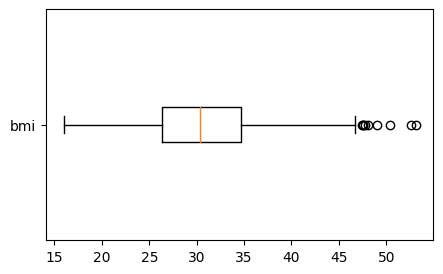

In [ ]:
plt.figure(figsize=(5, 3))
plt.boxplot(df.bmi,
            labels=['bmi'], vert=False)
plt.show()

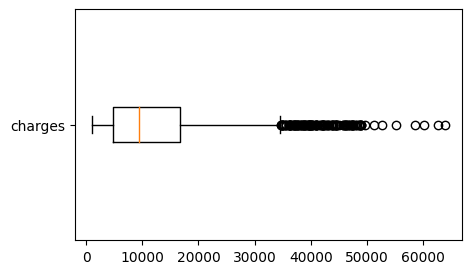

In [ ]:
plt.figure(figsize=(5, 3))
plt.boxplot(df.charges,
            labels=['charges'], vert=False)
plt.show()

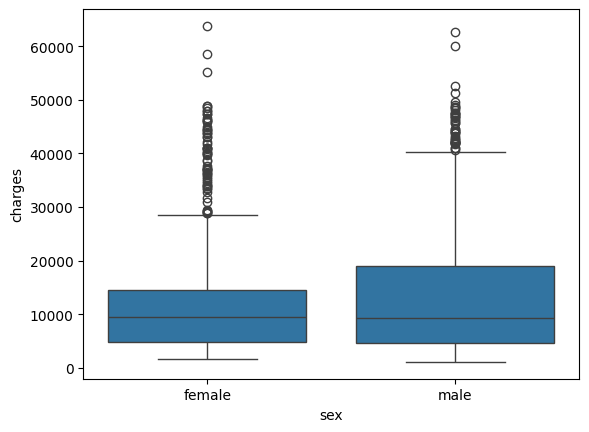

In [ ]:
sns.boxplot(data=df, x=df['sex'], y=df['charges'])
plt.show()

6. Используя признак charges или imb, проверить, выполняется ли
центральная предельная теорема. Использовать различные длины
выборок n. Количество выборок = 300. Вывести результат в виде
гистограмм. Найти стандартное отклонение и среднее для полученных
распределений.

In [ ]:
def sample_for_CLT(feature, sample_size):
    sample_means = []

    for i in range(301):
        sample = feature.sample(sample_size)
        sample_means.append(np.mean(sample))

    return sample_means

In [ ]:
values_mean = {50: sample_for_CLT(df.charges, 50),
               150: sample_for_CLT(df.charges, 100),
               300: sample_for_CLT(df.charges, 300)}
x = np.linspace(-4, 4, 100)

In [ ]:
print('Дисперсия генеральной совокупности:', stats_charges['std'])
print('Среднее генеральной совокупности:', stats_charges['mean'])

for i in [50, 150, 300]:
    print(f'\nВыборка для расходов размера {i}')
    print(f'Стандартное отклонение: {np.std(values_mean[i])}')
    print(f'Среднее: {np.mean(values_mean[i])}')

Дисперсия генеральной совокупности: 12110.011236693994
Среднее генеральной совокупности: 13270.422265141257

Выборка для расходов размера 50
Стандартное отклонение: 1728.841529885891
Среднее: 13291.873364724917

Выборка для расходов размера 150
Стандартное отклонение: 1191.9885639985118
Среднее: 13267.722481465978

Выборка для расходов размера 300
Стандартное отклонение: 603.3761208597717
Среднее: 13259.989527429912


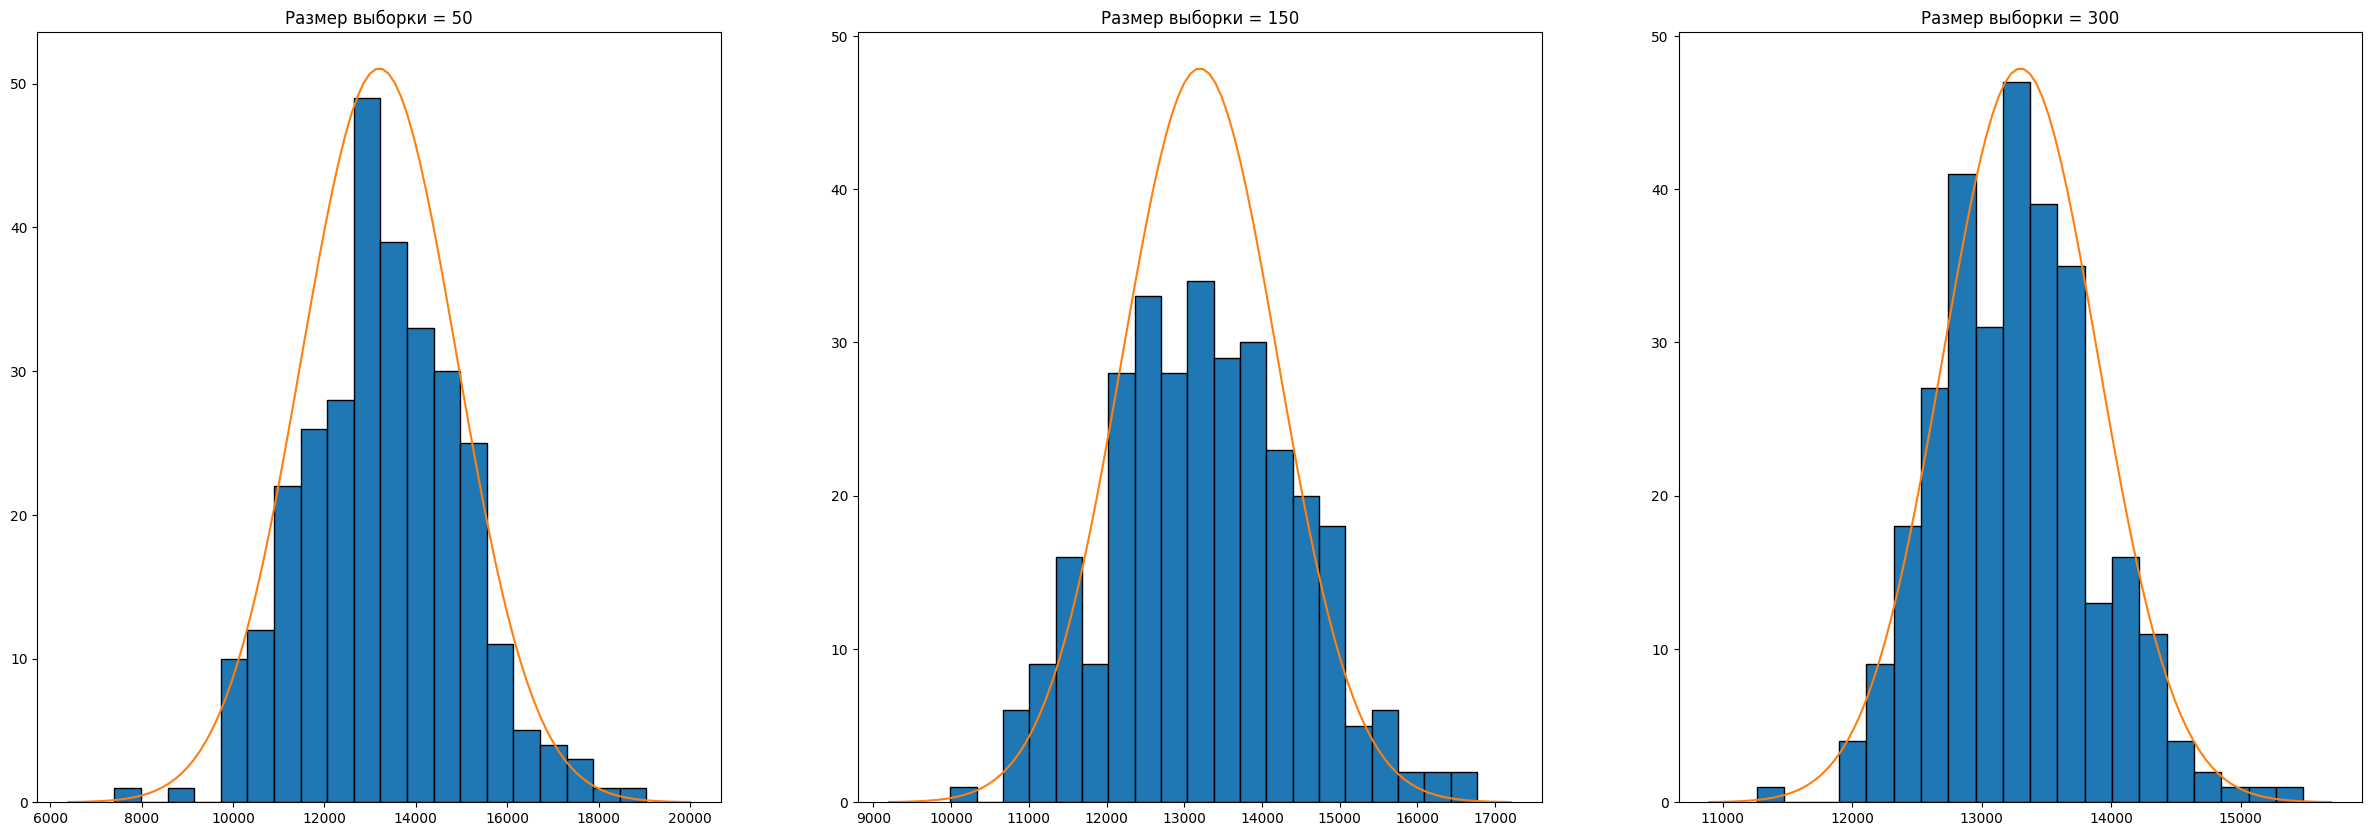

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))
ax[0].hist(values_mean[50], bins=20, edgecolor='black')
ax[0].plot(x*1700+13200,  sts.norm.pdf(x) * 128)
ax[0].set_title('Размер выборки = 50')

ax[1].hist(values_mean[150], bins=20, edgecolor='black')
ax[1].set_title('Размер выборки = 150')
ax[1].plot(x*1000+13200, sts.norm.pdf(x) * 120)

ax[2].hist(values_mean[300], bins=20, edgecolor='black')
ax[2].set_title('Размер выборки = 300')
ax[2].plot(x*600+13300, sts.norm.pdf(x) * 120)

plt.show()

7. Построить 95% и 99% доверительный интервал для среднего значения
расходов и среднего значения индекса массы тела.

In [ ]:
import math
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, se = np.mean(data), np.std(data) / math.sqrt(n)
    h = 1.96 * se if confidence == 0.95 else 2.58 * se if confidence == 0.99 else 1.65 * se
    return round(mean-h, 3), round(mean+h, 3)

In [ ]:
print('Доверительный интервал среднего значения charges (95%): ', confidence_interval(df.charges))
print('Доверительный интервал среднего значения bmi (95%): ', confidence_interval(df.bmi))
print('\nДоверительный интервал среднего значения charges (99%): ', confidence_interval(df.charges, 0.99))
print('Доверительный интервал среднего значения bmi (99%): ', confidence_interval(df.bmi, 0.99))

Доверительный интервал среднего значения charges (95%):  (12621.773, 13919.072)
Доверительный интервал среднего значения bmi (95%):  (30.337, 30.99)

Доверительный интервал среднего значения charges (99%):  (12416.587, 14124.257)
Доверительный интервал среднего значения bmi (99%):  (30.233, 31.093)


8. Проверить распределения следующих признаков на нормальность:
индекс массы тела, расходы. Сформулировать нулевую и
альтернативную гипотезы. Для каждого признака использовать KS-тест
и q-q plot.

In [ ]:
normal_dist = np.random.normal(loc=0.0, scale=1.0, size=df.shape[0])
# plt.hist(normal_dist, bins=40)
# plt.show()

In [ ]:
normalized_bmi = (df.bmi - df.bmi.min())/ (df.bmi.max() - df.bmi.min())

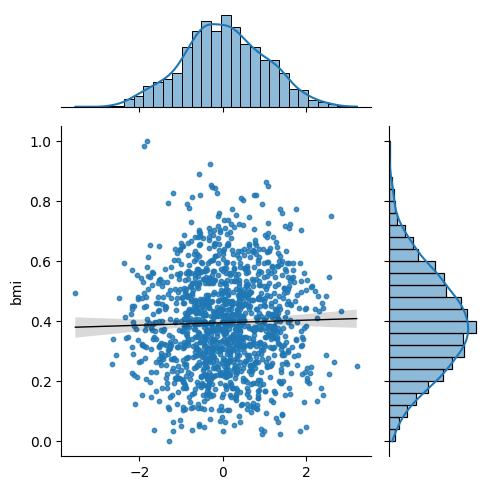

In [ ]:
sns.jointplot(x=normal_dist, y=normalized_bmi, kind='reg', truncate=True,
             height=5, ratio=3, line_kws={'lw': 1, 'color': 'black'},
             scatter_kws={'s': 10})
plt.show()

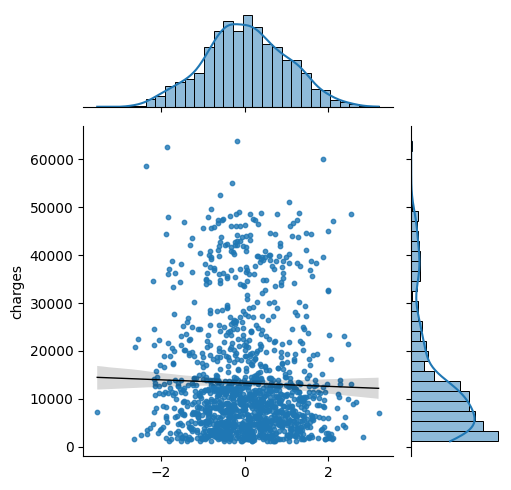

In [ ]:
sns.jointplot(x=normal_dist, y=df.charges, kind='reg', truncate=True,
              height=5, ratio=3, line_kws={'lw': 1, 'color': 'black'},
              scatter_kws={'s': 10})
plt.show()

p-значение для bmi: 0.315
p-значение для charges: 4.39305730768502e-42


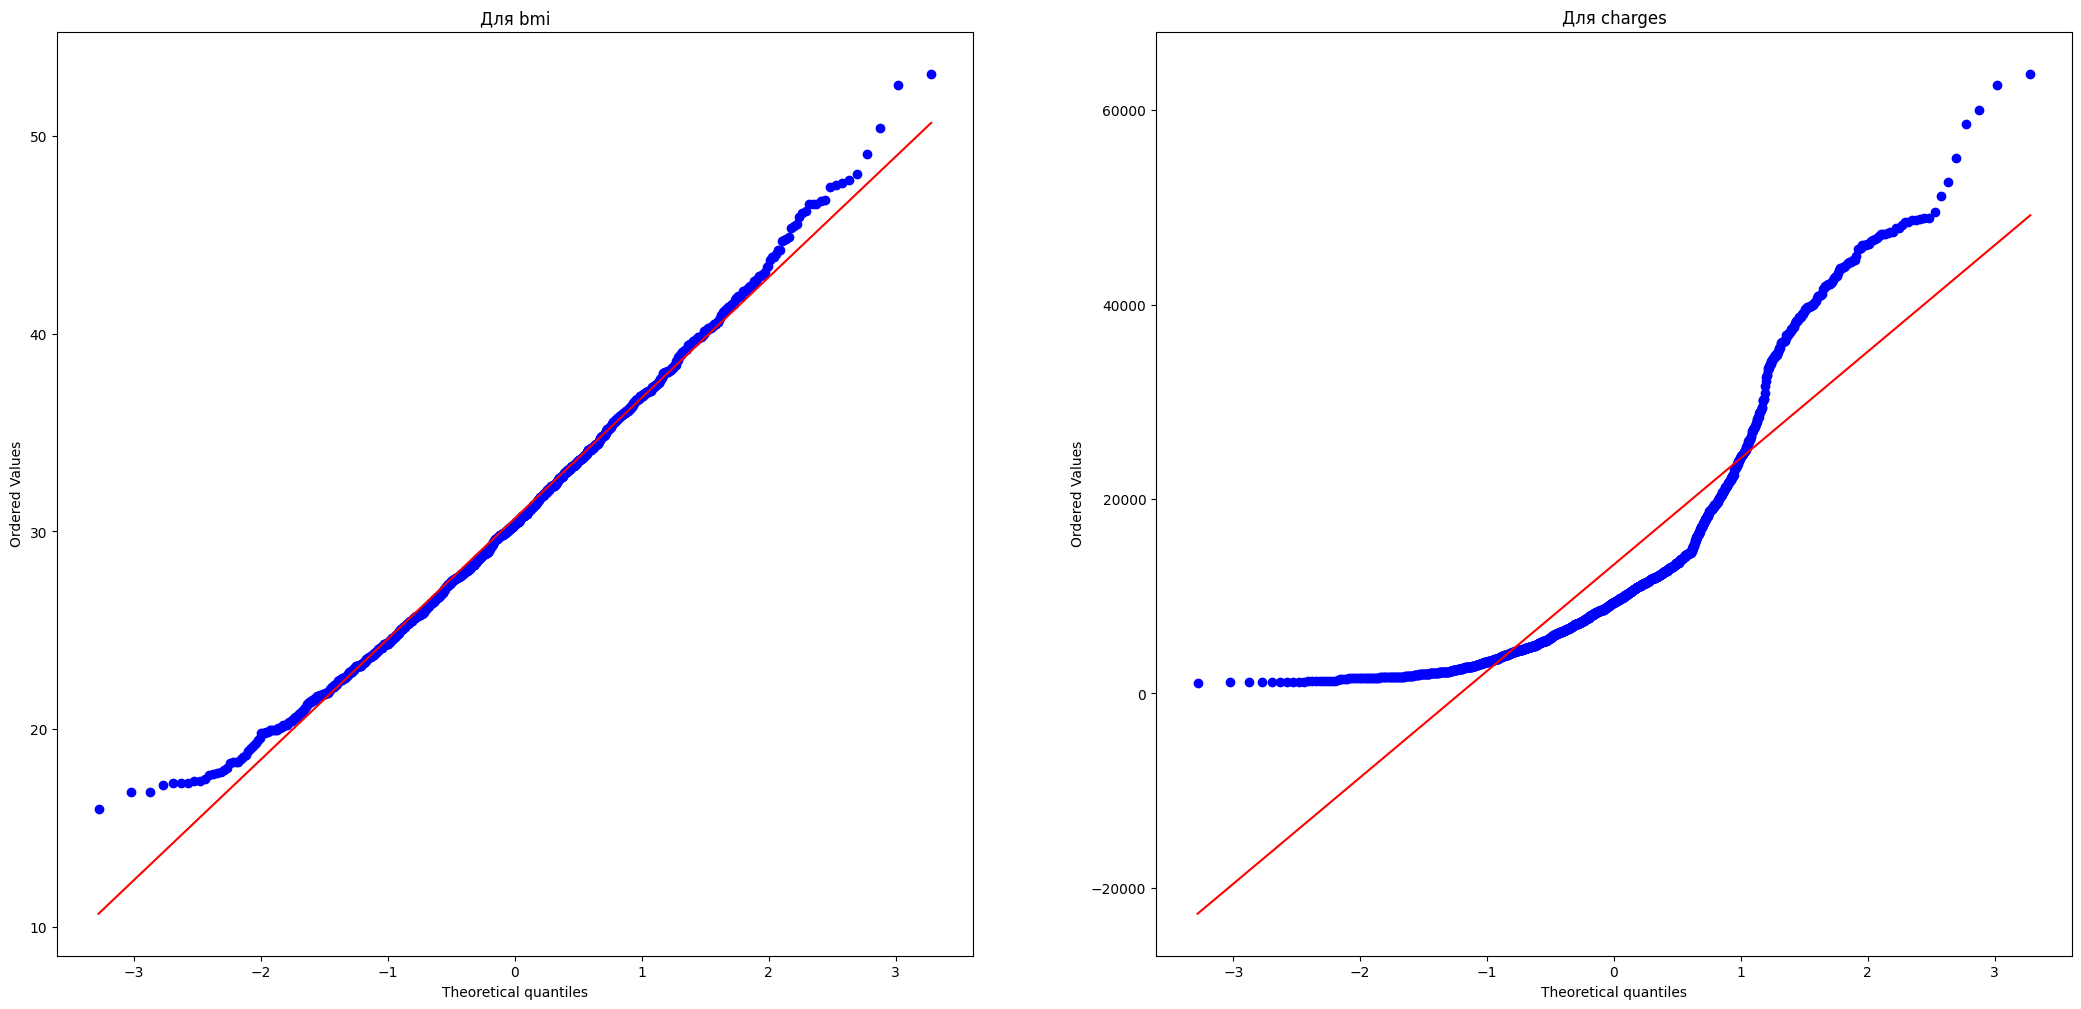

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(26,12))
sts.probplot(df.bmi, plot=ax[0])
ax[0].set_title('Для bmi')
sts.probplot(df.charges, plot=ax[1])
ax[1].set_title('Для charges')
bmi_ks_test = sts.kstest(sts.zscore(df.bmi), 'norm')
charges_ks_test = sts.kstest(sts.zscore(df.charges), 'norm')

print('p-значение для bmi:', round(bmi_ks_test[1], 3))
print('p-значение для charges:', charges_ks_test[1])

9. Загрузить данные из файла “ECDCCases.csv”.

In [ ]:
df = pd.read_csv("ECDCCases.csv")
print(df.shape)
df.head(3)

(61904, 12)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768


10. Проверить в данных наличие пропущенных значений. Вывести
количество пропущенных значений в процентах. Удалить два признака, в
которых больше всех пропущенных значений. Для оставшихся признаков
обработать пропуски: для категориального признака использовать
заполнение значением по умолчанию (например, «other»), для числового
признака использовать заполнение медианным значением. Показать, что
пропусков больше в данных нет.

In [ ]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вычисление процента пропущенных значений
missing_percentage = (missing_values / len(df)) * 100

# Вывод количества пропущенных значений в процентах
print(missing_percentage)

# Удаление двух признаков с наибольшим количеством пропусков
columns_to_drop = missing_percentage.nlargest(2).index
df = df.drop(columns=columns_to_drop)

# Разделение признаков на числовые и категориальные
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Заполнение пропусков в категориальных признаках значением 'other'
df[categorical_cols] = df[categorical_cols].fillna('other')

# Заполнение пропусков в числовых признаках медианным значением
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Проверка, что больше нет пропусков
print(df.isnull().sum())

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64
dateRep                    0
day                        0
month                      0
year                       0
cases            

11. Посмотреть статистику по данным, используя describe(). Сделать выводы
о том, какие признаки содержат выбросы. Посмотреть, для каких стран
количество смертей в день превысило 3000 и сколько таких дней было.

In [ ]:
# Статистический анализ данных
statistics = df.describe()
print(statistics)

# Поиск стран, где количество смертей в день превысило 3000
high_deaths = df[df['deaths'] > 3000]

# Подсчет количества дней, где количество смертей превысило 3000
high_deaths_count = high_deaths.groupby('countriesAndTerritories').size()
print(high_deaths_count)

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  
countriesAndTerritories
Argentina                   1
Ecuador                    

12. Найти дублирование данных. Удалить дубликаты

In [ ]:
duplicates = df.duplicated()

# Удаление дубликатов
df = df.drop_duplicates()

# Проверка, что дубликатов больше нет
print(f"Количество дубликатов: {df.duplicated().sum()}")

Количество дубликатов: 0


13. Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна
выборка – это индекс массы тела людей c региона northwest, вторая
выборка – это индекс массы тела людей с региона southwest. Сравнить
средние значения этих выборок, используя t-критерий Стьюдента.
Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [ ]:
# Шаг 1: Загрузка данных
df = pd.read_csv('bmi.csv')

# Шаг 2: Выборки по регионам
northwest_bmi = df[df['region'] == 'northwest']['bmi']
southwest_bmi = df[df['region'] == 'southwest']['bmi']

# Шаг 3: Проверка на нормальность (критерий Шапиро-Уилка)
shapiro_nw = sts.shapiro(northwest_bmi)
shapiro_sw = sts.shapiro(southwest_bmi)

print(f"Шапиро-Уилк для northwest: {shapiro_nw}")
print(f"Шапиро-Уилк для southwest: {shapiro_sw}")

# Шаг 4: Проверка гомогенности дисперсий (критерий Бартлетта)
bartlett_test = sts.bartlett(northwest_bmi, southwest_bmi)
print(f"Критерий Бартлетта: {bartlett_test}")

# Шаг 5: Проведение t-критерия Стьюдента
t_test = sts.ttest_ind(northwest_bmi, southwest_bmi, equal_var=True)
print(f"T-критерий Стьюдента: {t_test}")

Шапиро-Уилк для northwest: ShapiroResult(statistic=0.995464981663833, pvalue=0.4655897798883668)
Шапиро-Уилк для southwest: ShapiroResult(statistic=0.9949269360950754, pvalue=0.36296471144790743)
Критерий Бартлетта: BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)
T-критерий Стьюдента: TtestResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695, df=648.0)


14. Кубик бросили 600 раз, получили следующие результаты:

 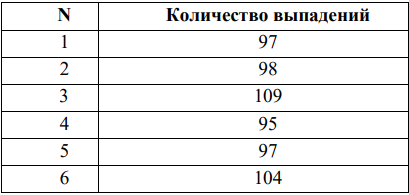

С помощью критерия Хи-квадрат проверить, является ли полученное
распределение равномерным. Использовать функцию
scipy.stats.chisquare().


In [ ]:
import numpy as np
from scipy.stats import chisquare

# Шаг 1: Количество выпадений для каждого значения кубика
observed = np.array([97, 98, 109, 95, 97, 104])

# Шаг 2: Ожидаемое равномерное распределение (600 раз, значит, 600 / 6 для каждого)
expected = np.array([600 / 6] * 6)

# Шаг 3: Применение критерия Хи-квадрат
chi2_test = chisquare(f_obs=observed, f_exp=expected)
print(f"Хи-квадрат тест для равномерного распределения: {chi2_test}")

Хи-квадрат тест для равномерного распределения: Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)


С помощью критерия Хи-квадрат проверить, являются ли переменные
зависимыми.

Создать датафрейм, используя следующий код:

    data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
        'Гражданский брак': [80,22,20,35,6,4],
        'Не состоит в отношениях': [35,44,35,6,8,22]
    })
    data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

Использовать функцию scipy.stats.chi2_contingency().

Влияет ли семейное положение на занятость?

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Шаг 1: Создание датафрейма
data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

# Шаг 2: Применение критерия Хи-квадрат
chi2_result, p_value, dof, expected = chi2_contingency(data)
print(f"Результат Хи-квадрат теста: Chi2={chi2_result}, p-value={p_value}")

Результат Хи-квадрат теста: Chi2=122.29654948595365, p-value=1.7291616900960234e-21
